<a href="https://colab.research.google.com/github/leandroavidigal/Projetos-em-Python/blob/main/Projeto_An%C3%A1lise_de_clientes_utilizando_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**PROJETO FINAL - PYTHON**

Nesse projeto será abordado as fases de Exploração, Transformação e limpeza, Visualização de dados e Storytelling.

#### **1. Exploração de Dados**

Os dados que serão explorados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. 

Nosso principal objetivo é entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira.

Um dado importante está na segunda coluna chamada default que contém a informação se um cliente é adimplente (`default = 0`), ou inadimplente (`default = 1`).

Abaixo temos as características de cada coluna do nosso arquivo de dados.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Nesse projeto utilizaremos a biblioteca `pandas`, pois é amplamente utilizada em projetos com python e nos fornece ferramentas para manipular, analisar e visualizar dados de forma eficiente e intuitiva.

In [ ]:
import pandas as pd

O código `import pandas as pd` é usado para importar a biblioteca pandas para o seu código Python. O pandas é uma biblioteca de código aberto que fornece estruturas de dados de alto desempenho e fáceis de usar para análise de dados em Python.

Ao utilizar o `import pandas as pd`, você cria um alias "pd" para a biblioteca pandas, tornando mais fácil e mais comum referenciar seus métodos e atributos no seu código.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

O método `read_csv()` da biblioteca pandas é usado para ler um arquivo CSV e criar um DataFrame com base nos dados do arquivo. O primeiro argumento de read_csv() é a localização do arquivo CSV, que neste caso é uma URL: 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'.

O segundo argumento, na_values='na', é opcional e é usado para especificar como os valores ausentes (também conhecidos como valores nulos) são tratados durante a leitura do arquivo. Neste caso, na_values é definido como 'na', o que significa que a string "na" será tratada como um valor ausente e substituída por um valor nulo no DataFrame resultante.

Portanto, o código lê o arquivo CSV no URL fornecido e cria um DataFrame pandas com base nos dados do arquivo, com valores nulos representados pelos valores "na". O DataFrame resultante é armazenado na variável df.

Abaixo vamos utilizar o método `head()` que retorna as primeiras n linhas do DataFrame, onde n é um número inteiro. Se nenhum valor é passado para n, o método retorna as primeiras 5 linhas por padrão.

Nesse caso, n é igual a 10, então o método head() retorna as primeiras 10 linhas do DataFrame df.

Essa é uma forma comum de visualizar as primeiras linhas de um DataFrame para ter uma ideia dos dados contidos nele. É útil para verificar se o DataFrame foi lido corretamente e se os dados estão em um formato adequado.

In [ ]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


##### **1.1. Estrutura** 

Utilizamos a função `shape` para descobrimos a quantidade de linhas e colunas em nosso arquivo

In [ ]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

Vamos contabilizar agora quantos clientes estão adimplentes (`default = 0`) e quantos estão inadimplentes no momento (`default = 1`).

In [ ]:
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
df[df['default'] == 1].shape

(1627, 16)

Temos adimplentes = 8500 e inadimplentes = 1627

In [ ]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

Vamos descobrir quanto essa quantidade representa em porcentagem

In [ ]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


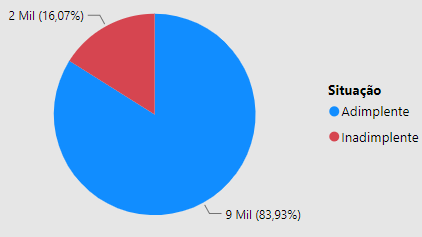

##### **1.2. Schema** 

In [ ]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Abaixo vamos identificar as colunas e seus respectivos tipos de dados por meio do método `dtypes`.

In [ ]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Identificando os atributos **categóricos** que são tipos de variáveis que podem assumir um número limitado e definido de valores discretos, geralmente representando uma categoria ou classe específica. 

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Agora vamos identificar os atributos **numéricos** que são um tipo de variáveis que contêm um valor numérico, como um número inteiro ou um número de ponto flutuante. 

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


##### **1.3. Dados faltantes** 

Um ponto importante é a identificação dos dados faltantes, pois os mesmos podem atrapalhar a análise, dessa forma após a identificação desses dados é possível realizar a limpeza do nosso arquivo, como veremos mais a frente.

Exemplo de dados faltantes são:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos verificar quais colunas possuem dados faltantes por meio do código abaixo:

In [ ]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [ ]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [ ]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [ ]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


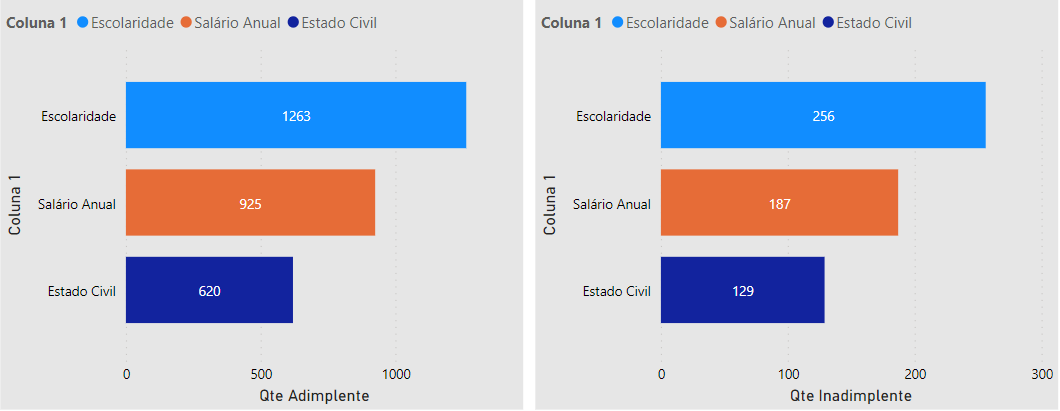

#### **2. Transformação e limpeza de dados - data wrangling**

Nesse bloco realizaremos:

 - Correção do *schema* das nossas colunas;
 - Remoção os dados faltantes.

##### **2.1. Correção de schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [ ]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [ ]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [ ]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [ ]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

As duas colunas (limite de credito e valor transacoes 12m) foram alteradas para o tipo float.

Vamos agora listar os atributos categóricos e numéricos.

 - Atributos **categóricos**.

In [ ]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [ ]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


##### **2.2. Remoção de dados faltantes** 

O código `df.dropna(inplace=True)` é usado para remover todas as linhas de um dataframe que contêm valores nulos.

O parâmetro inplace=True indica que a operação deve ser feita no próprio dataframe (em vez de criar uma cópia dele).
O método dropna() é responsável por realizar a remoção das linhas com valores nulos.
Em resumo, a execução deste código resulta na modificação do dataframe original, removendo todas as linhas que contêm valores nulos.

In [ ]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [ ]:
df.shape

(7081, 16)

In [ ]:
df[df['default'] == 0].shape

(5968, 16)

In [ ]:
df[df['default'] == 1].shape

(1113, 16)

In [ ]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [ ]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


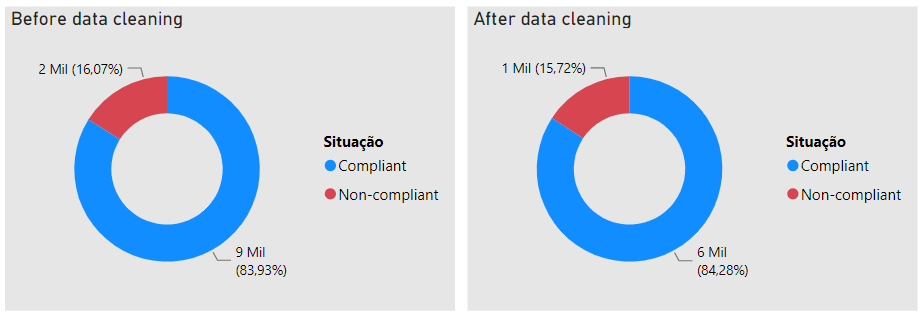

#### **3. Visualização de dados**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

O código acima importa as bibliotecas `seaborn` e `matplotlib.pyplot`, e define o estilo de plotagem do seaborn como "whitegrid".

`seaborn` é uma biblioteca de visualização de dados em Python, que fornece uma interface de alto nível para a criação de gráficos estatísticos atraentes e informativos.

`matplotlib.pyplot` é uma biblioteca de plotagem de gráficos em Python, que fornece funções para criar diferentes tipos de gráficos, como histogramas, gráficos de linhas, gráficos de dispersão, entre outros.

`sns.set_style("whitegrid")` é uma função do seaborn que define o estilo de plotagem dos gráficos. Neste caso, o estilo "whitegrid" adiciona linhas de grade brancas ao fundo do gráfico, tornando mais fácil identificar os pontos de dados no gráfico.

In [ ]:
df_adimplente = df[df['default'] == 0]

In [ ]:
df_inadimplente = df[df['default'] == 1]

##### **3.1. Visualizações categóricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [ ]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


##### **3.2. Nível de escolaridade**

Abaixo vamos analisar o nível de **escolaridade** em relação aos clientes adimplentes e inadimplentes.

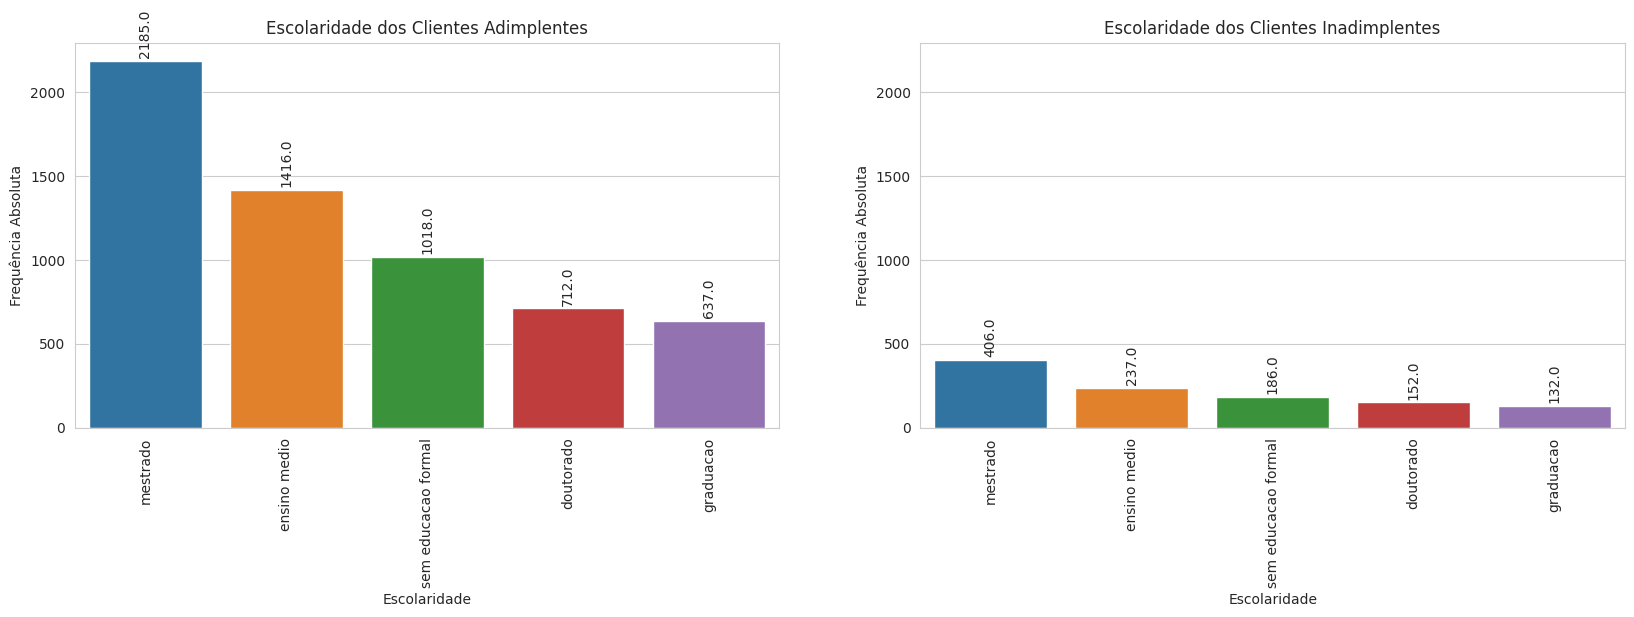

In [ ]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,2, figsize=(20, 5), sharex=True)

for dataframe in [df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.sort_values(by=['frequencia_absoluta'], ascending=False, inplace=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  # Adiciona valores de cada coluna no gráfico
  for i, bar in enumerate(f.containers):
    for rect in bar:
        height = rect.get_height()
        f.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 2 pontos acima da barra
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

  eixo += 1

figura.show()

Quando se analiza a porcentagem em relação a cada nível de escolaridade não é possível identificar uma grande diferença entre elas, conforme tabela a seguir.

|             | Mestrado | Médio | Sem Formação | Doutorado | Graduação |
|-------------|----------|-------|--------------|-----------|-----------|
| Adimplente  | 84%      | 86%   | 85%          | 82%       | 83%       |
| Inadimplente| 16%      | 14%   | 15%          | 18%       | 17%       |
| Total       | 100%     | 100%  | 100%         | 100%      | 100%      |

O nível percentualmente de Adimplentes ficou com as pessoas que possuem Ensino Médio e os maiores níveis de Inadimplentes está em quem tem Doutorado. Interessante o resultado pois se analisado apenas os números absolutos teremos outro resultado com o nível de Mestrado sendo o mais Adimplente e Inadinplemente ao mesmo tempo, isso se dar devio o  mesmo ter a maior quantidade de pessoas nos dados estudados. 

##### **3.3. Salário Anual**

Abaixo vamos analisar o **salário anual** recebidos pelos clientes adimplentes e inadimplentes.

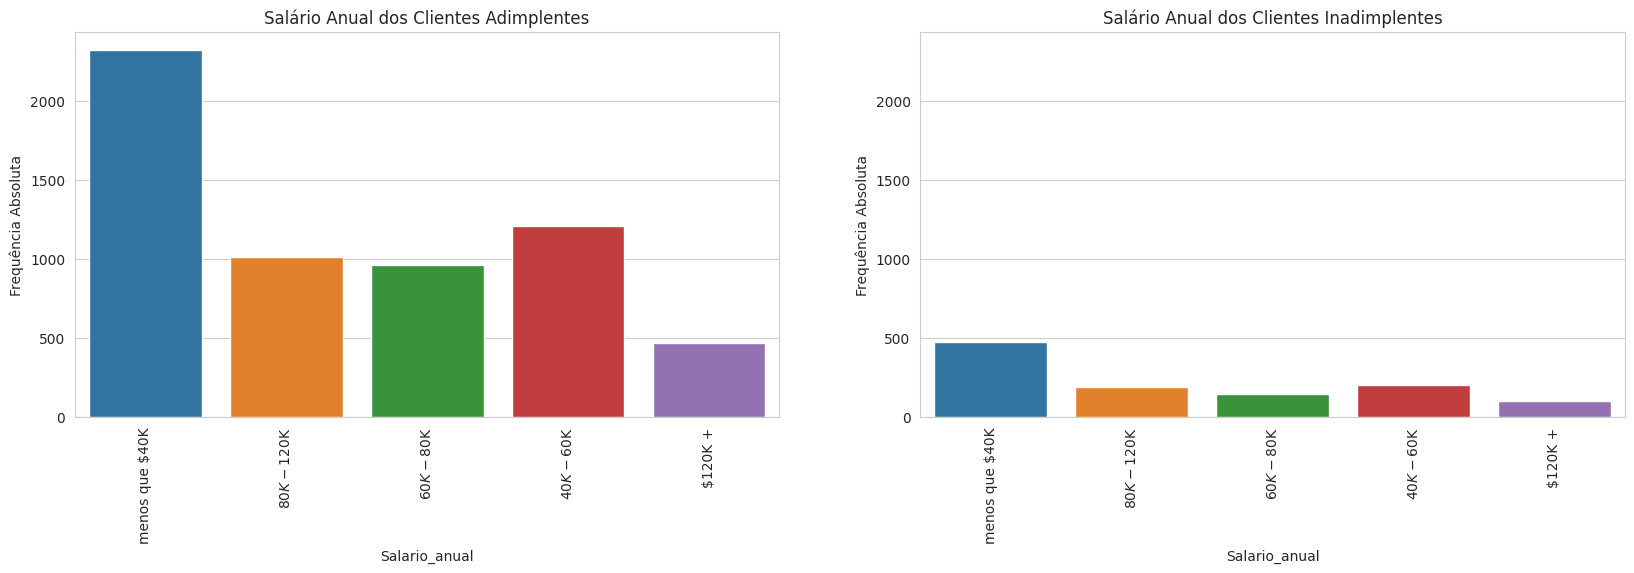

In [ ]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

max_y = 0
figura, eixos = plt.subplots(1,2, figsize=(20, 5), sharex=True)

for i, dataframe in enumerate([df_adimplente, df_inadimplente]):

  df_to_plot = dataframe[coluna].value_counts().sort_index(ascending=False).to_frame()
  df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
  df_to_plot[coluna] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)

  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[i])
  f.set(title=titulos[i], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

figura.show()

##### **3.4. Visualizações numéricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [ ]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


##### **3.5. Transações no últimos 12 meses**

Abaixo vamos analisar a quantidade de transações.

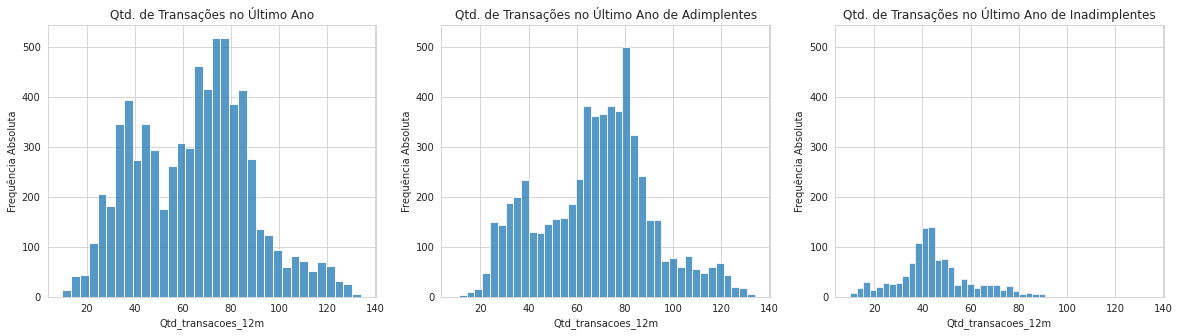

In [ ]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Agora temos a análise do valor das transações.



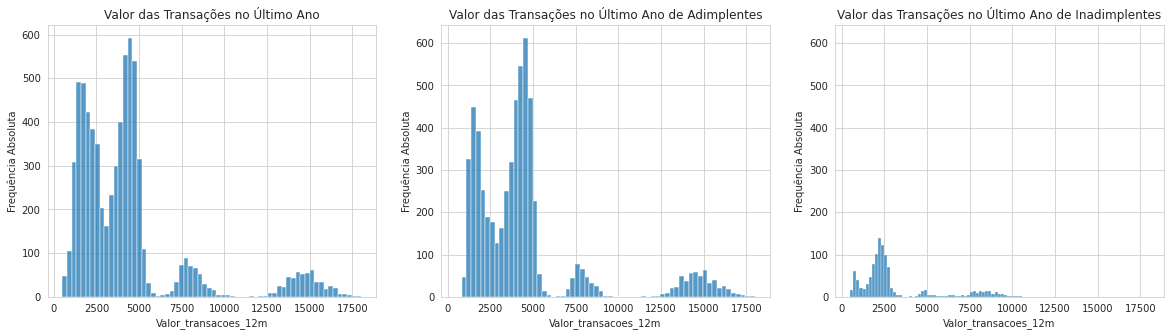

In [ ]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

E temos por último a comparação entre o Valor de Transações nos Últimos 12 Meses e a Quantidade de Transações nos Últimos 12 Meses

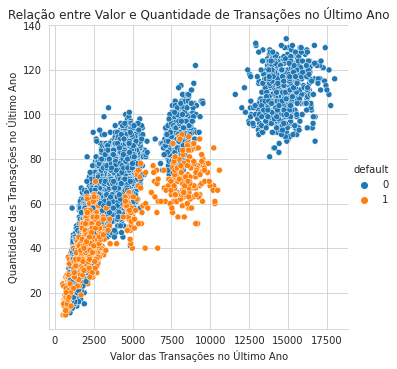

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

##### **3.6. Tipo de cartão contratado**

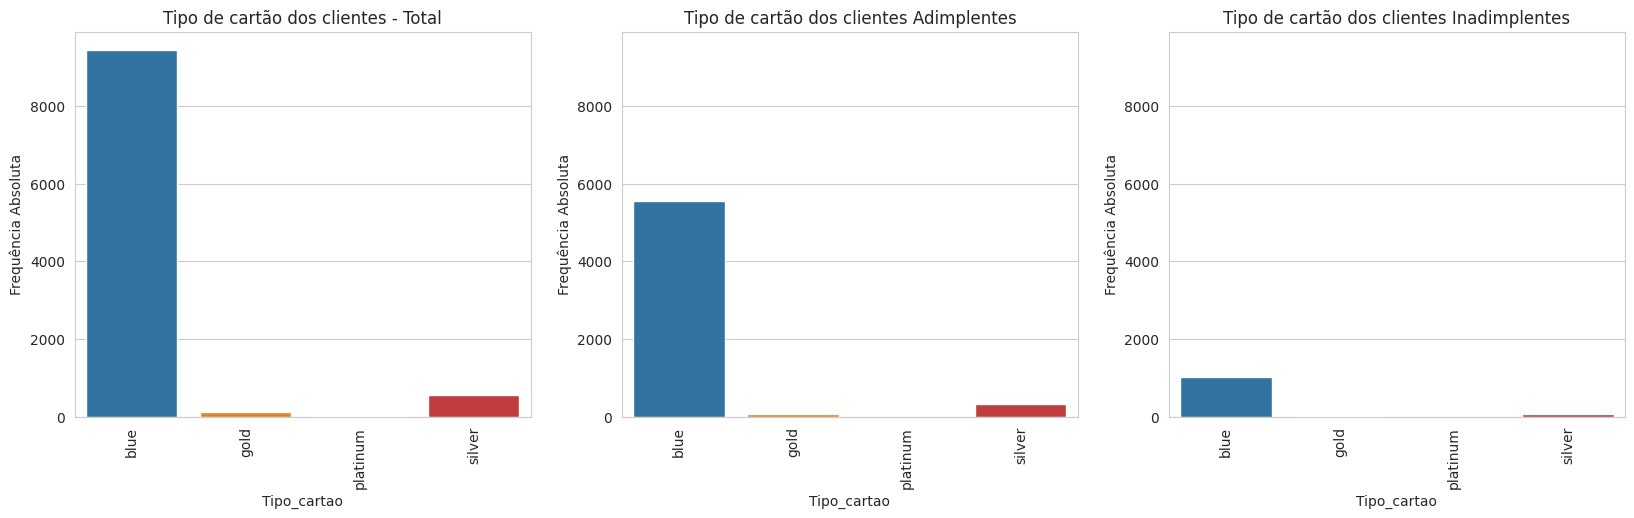

In [ ]:
coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes - Total','Tipo de cartão dos clientes Adimplentes','Tipo de cartão dos clientes Inadimplentes']


eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

 df_to_plot = dataframe[coluna].value_counts().to_frame()
 df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
 df_to_plot[coluna] = df_to_plot.index
 df_to_plot.reset_index(inplace=True, drop=True)
 df_to_plot.sort_values(by=[coluna], inplace=True)

 f = sns.barplot(x=df_to_plot[coluna],y=df_to_plot['frequencia_absoluta'],ax=eixos[eixo])
 f.set(title=titulos[eixo],xlabel=coluna.capitalize(),ylabel='Frequência Absoluta')

 f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
 _, max_y_f = f.get_ylim()
 max_y = max_y_f if max_y_f > max_y else max_y
 f.set(ylim=(0, max_y))

 eixo += 1
 figura.show()

##### **3.7. Relacionamento do cliente com o banco em meses**

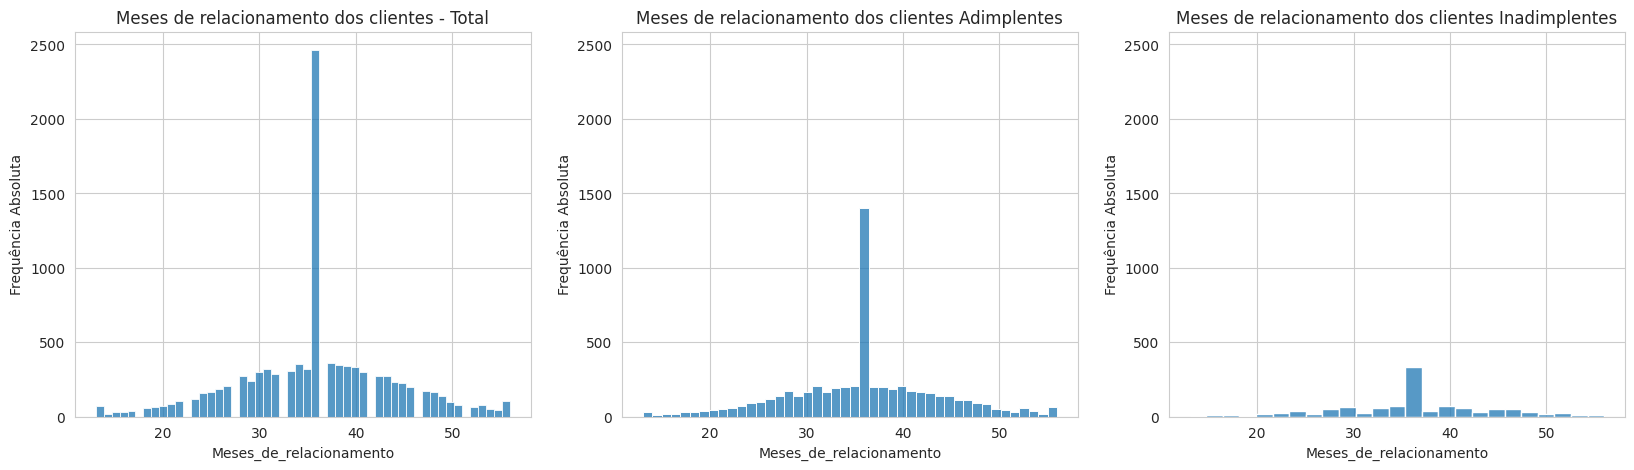

In [ ]:
coluna = 'meses_de_relacionamento'
titulos = ['Meses de relacionamento dos clientes - Total', 'Meses de relacionamento dos clientes Adimplentes', 'Meses de relacionamento dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

#### **4. Resumo dos *insights* gerados**

- Neste projeto foi necessário realizar a limpeza dos dados faltantes para melhor entendimento dos resultados obtidos estatisticamente, porém é recomnedado que toda fonte de dados seja preenchida completamente para obtermos resultados mais precisos. Nesse caso é necessário a complementação dos dados das colunas “escolaridade”, “salário anual” e “estado civil”. Portanto, ao lidar com dados faltantes em um projeto de ciência de dados, é importante avaliar cuidadosamente o impacto potencial da ausência de dados em relação aos objetivos do projeto e decidir como abordar essa questão com base no contexto específico e na qualidade dos dados disponíveis.


- O nível percentualmente de Adimplentes ficou com as pessoas que possuem Ensino Médio e os maiores níveis de Inadimplentes está em quem tem Doutorado. Interessante o resultado pois se analisado apenas os números absolutos teremos outro resultado com o nível de Mestrado sendo o mais Adimplente e Inadinplemente ao mesmo tempo, isso se dar devido o  mesmo ter a maior quantidade de pessoas nos nossos dados. Com isso é importante uma maior interação com o grupo de pessos que possuem doutorado para entender os motivos para essa inadimplência e tentar reverter este quadro. 

- Outro grupo no qual é importante uma interveção para entendimento de como reduzir o nivel de inadimplemento é o que ganha abaixo de 40mil anual o que equivale a 3,33mil mensal.

- Não foi possível encontrar uma relação para os inadimentes quanto ao tipo de cartão adiquirido, pois a grande maioria dos cartões não obdecem a alguma regra de escolaridade ou salário. Este é um ponto a ser resolvido, pois o serviço prestado deve estar bem alinhado com as políticas do banco para melhor controle do seviço.

- A maioria das transações se concentra em valores menores (<= 5k), embora haja picos distintos em outras faixas de valor. Os membros inadimplentes tendem a fazer transações principalmente próximas a R$ 2.500, que é menos comum entre os membros adimplentes.

- Clientes com alto volume e valor de transações geralmente não fazem parte do grupo de inadimplentes. Por outro lado, clientes com menor volume e valor de transações tendem a ter maior inadimplência. Existem dois grupos importantes de inadimplentes: aqueles com volume médio de transações entre 7k e 10k e aqueles com baixo volume de transações e valor inferior a 2,5k.

- A maioria dos clientes tem um relacionamento de 36 meses com a empresa, mas isso não parece ter influência significativa na inadimplência, exceto para os períodos de 28 e 42 meses, que apresentam uma menor concentração de membros inadimplentes e afetam a distribuição geral do grupo.
